# 판다스

## 01 판다스란?

### 1 판다스의 개념
- 판다스는 데이터 분석 라이브러리로 Excel과 비슷하다 생각할 수 있다. 
- 데이터 테이블을 다루기 위한 도구로 가장 적합하다.
- 판다스는 데이터를 다루기 위해 넘파이를 사용한다. 때문에 효율적으로 사용하기 위한 인덱싱, 연산, 전처리 등의 다양한 함수를 제공.
- 판다스는 데이터 테이블 형태인 2차원 데이터를 다룬다. 
- 판다스에서 테이블 전체를 다루는 객체를 데이터프레임(DataFrame)이라 하고, 각각 열 데이터를 시리즈(Series)라 한다.   
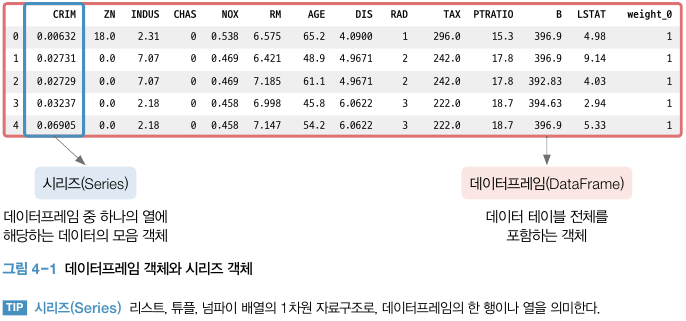

### 2 시리즈 객체
- 시리즈 객체는 피쳐 벡터(feature vector)와 같은 개념으로 사용하는데, 일반적으로 하나의 피쳐 데이터를 포함하는 형태로 다루어진다.
- 시리즈 객체는 생성된 데이터프레임(DataFrame)안에 포함되기도 하지만 list, dict, ndarray 등과 같은 다양한 데이터 타입이 시리즈 객체 형태로 변환될 수 있다.   
```python
from pandas import Series, DataFrame
list_data = [1,2,3,4,5]
list_name = ["a","b","c","d","e"]
example_obj = Series(data = list_data, index=list_name)
example_obj
```
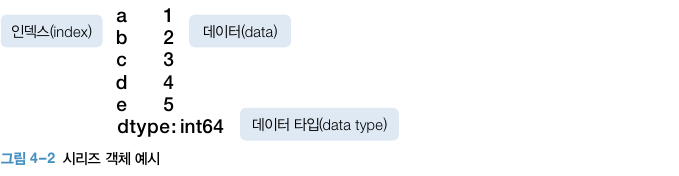

- 시리즈 객체를 생성하면 기본적으로 세 가지 요소(property)인 데이터, 인덱스, 데이터 타입이 생성된다.    
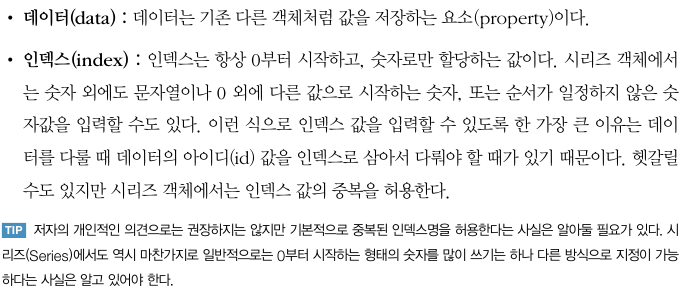      

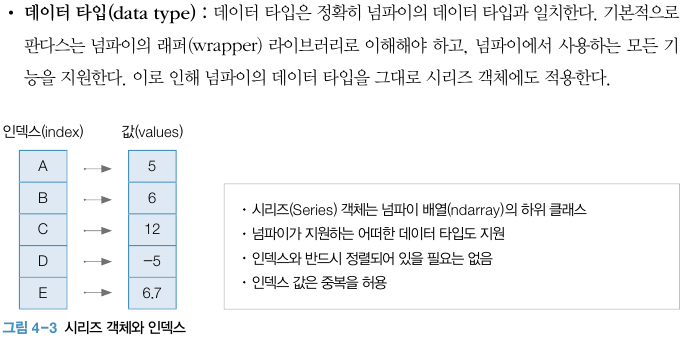

In [1]:
import pandas as pd # pandas 모듈 호출
import numpy as np # numpy 모듈 호출

from pandas import Series, DataFrame

list_data = [1,2,3,4,5]
list_name = ["a","b","c","d","e"]
example_obj = Series(data = list_data, index=list_name)
example_obj

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [2]:
example_obj.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [3]:
example_obj.values

array([1, 2, 3, 4, 5], dtype=int64)

In [4]:
type(example_obj.values)

numpy.ndarray

In [5]:
example_obj.dtype

dtype('int64')

- 시리즈 객체의 경우 객체이름을 변경 할 수 있는데 이는 일종의 열 이름을 지정해 주는 방식이다. 인덱스에 대한 이름도 추가 지정이 가능하다.

In [6]:
example_obj.name = "number"
example_obj.index.name = "id"
example_obj

id
a    1
b    2
c    3
d    4
e    5
Name: number, dtype: int64

- 일반적으로 시리즈 객체를 생성하는 방법은 데이터프레임 객체를 생성한 다음에 각 열에서 시리즈 객체를 ?뽑는 것이다. 하지만 이외에도 다양한 시퀀스형 데이터 타입에 대해 저장이 가능하며, 다음 코드와 같이 딕셔너리 타입으로 생성된다.

In [7]:
dict_data = {"a":1, "b":2, "c":3, "d":4, "e":5}
example_obj = Series(dict_data, dtype=np.float32, name="example_data")
example_obj

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
Name: example_data, dtype: float32

- 판다스의 모든 객체는 인덱스 값을 기준으로 생성되고, 아래와 같이 기존 데이터에 인덱스 값을 추가하면 해당 값들은 '숫자가 아님(Not a Number)'을 의미하는 NaN 값이 출력된다.
- 일반적으로 NaN은 null을 의미하며, 파이썬에서는 None을 의미한다.

In [8]:
dict_data_1 = {"a":1, "b":2, "c":3, "d":4, "e":5}
indexes = ["a","b","c","d","e","f","g","h"]
series_obj_1 = Series(dict_data_1, index=indexes)
series_obj_1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    NaN
g    NaN
h    NaN
dtype: float64

### 3 데이터 프레임 객체

- 데이처프레임 객체는 데이터 테이블 전체를 지칭하는 객체로, 여러 개의 시리즈 묶음으로 구성되어 있다. 
- 시리즈의 묶음이기 때문에 넘파이 배열의 특성을 그대로 가지고 있는 객체라고 할 수 있다. 
- 각각의 열별로 데이터의 타입이 다르다.   
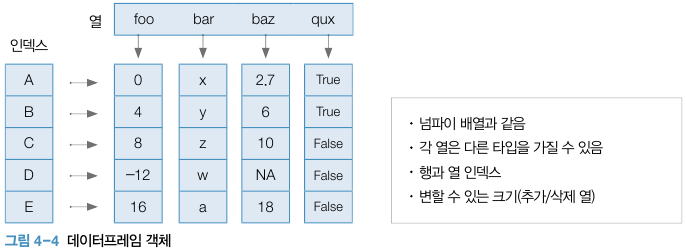

#### 3.1 데이터프래임의 생성
- 기본적으로 .csv나 .xlsx와 같은 스프레드시트형 확장자를 가진 파일에서 데이터를 바로 로딩한다. 
- resd_확장자 형태의 함수를 사용할 수 있다.

housing.data는 머신러닝 및 통계학에서 널리 사용되는 보스턴 주택 가격(Boston Housing) 데이터셋.   

주요 특징    
목적: 주택 가격 예측(회귀 문제)    
샘플 수: 506개    
특성 수: 13개(입력 변수), 1개(타깃 변수: 주택 가격)    
타깃: 각 구역의 주택 가격(단위: $1000)    
주요 컬럼(특성)    
- CRIM: 범죄율
- ZN: 25,000 평방피트 이상 주거지역 비율
- INDUS: 비소매상업지역 비율
- CHAS: 찰스강 인접 여부(1: 인접, 0: 비인접)
- NOX: 일산화질소 농도
- RM: 주택당 평균 방 개수
- AGE: 1940년 이전에 건설된 주택 비율
- DIS: 5개 보스턴 고용센터까지의 거리
- RAD: 고속도로 접근성 지수
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 인구 비율
- LSTAT: 저소득층 비율
- MEDV: 타깃 변수, 주택 가격(중앙값, $1000 단위)

In [9]:
import pandas as pd # (1) pandas 모듈 호출
# data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data' # (2) 데이터 URL을 변수 data_url에 넣기
data_url = 'https://url.kr/vc7b8x'
df_data = pd.read_csv(data_url, sep=r'\s+', header = None) # (3) csv 데이터 로드
df_data.columns = ['CRIM','ZN', 'INDUS', 'CHAS', 
                   'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                   'TAX', 'PTRATIO' ,'B', 'LSTAT', 'MEDV'] # (4) 데이터의 열 이름 지정
df_data.head() # (5) 데이터 출력

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
df_data.info()
df_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- 데이터 프레임을 직접 만들 수 있다. 

In [11]:
from pandas import Series, DataFrame

raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'],
            'age': [42, 52, 36, 24, 73],
            'city': ['San Francisco', 'Baltimore', 'Miami', 'Douglas', 'Boston']}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'city'])
df

,first_name,last_name,age,city
0,Jason,Miller,42,San Francisco
1,Molly,Jacobson,52,Baltimore
2,Tina,Ali,36,Miami
3,Jake,Milner,24,Douglas
4,Amy,Cooze,73,Boston


#### 3.2 데이터프레임의 열 다루기
- 시리즈 객체에서 가장 중요한 것이 인덱스였다면, 데이터프레임에서는 인덱스 뿐만 아니라 열 이름을 선정하는 것이 중요하다.

In [12]:
DataFrame(raw_data, columns = ["age", "city"])

,age,city
0,42,San Francisco
1,52,Baltimore
2,36,Miami
3,24,Douglas
4,73,Boston


In [13]:
df2 = DataFrame(raw_data,
          columns = ["first_name","last_name","age", "city", "debt"]
         )
df2

,first_name,last_name,age,city,debt
0,Jason,Miller,42,San Francisco,NaN
1,Molly,Jacobson,52,Baltimore,NaN
2,Tina,Ali,36,Miami,NaN
3,Jake,Milner,24,Douglas,NaN
4,Amy,Cooze,73,Boston,NaN


In [14]:
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  5 non-null      object
 1   last_name   5 non-null      object
 2   age         5 non-null      int64 
 3   city        5 non-null      object
 4   debt        0 non-null      object
dtypes: int64(1), object(4)
memory usage: 332.0+ bytes


,age
count,5.000000
mean,45.400000
std,18.460769
min,24.000000
25%,36.000000
50%,42.000000
75%,52.000000
max,73.000000


## 02 데이터 추출
- 일반적으로 데이터는 csv파일이나 데이터베이스 안에 들어가 있기 때문에 이를 가져온 후 적절한 형태의 데이터를 추출하는 것이 판다스를 사용하는 데 있어 중요한 기법 중 하나다.

### 1 데이터 로딩
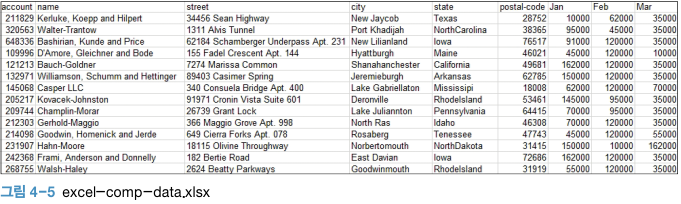

실습파일다운로드: https://han.gl/iyAzf

In [15]:
import pandas as pd # pandas 모듈 호출
import numpy as np # numpy 모듈 호출

df = pd.read_excel("C:/py_data/source/ch04/excel-comp-data.xlsx")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account      15 non-null     int64 
 1   name         15 non-null     object
 2   street       15 non-null     object
 3   city         15 non-null     object
 4   state        15 non-null     object
 5   postal-code  15 non-null     int64 
 6   Jan          15 non-null     int64 
 7   Feb          15 non-null     int64 
 8   Mar          15 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 1.2+ KB


### 2 열 이름을 사용한 데이터 추출
- head, tail 함수: 데이터의 처음 n개나 마지막 n개를 호출하는 함수

In [17]:
df.head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000


In [18]:
df.head(3).T

,0,1,2
account,211829,320563,648336
name,"Kerluke, Koepp and Hilpert",Walter-Trantow,"Bashirian, Kunde and Price"
street,34456 Sean Highway,1311 Alvis Tunnel,62184 Schamberger Underpass Apt. 231
city,New Jaycob,Port Khadijah,New Lilianland
state,Texas,NorthCarolina,Iowa
postal-code,28752,38365,76517
Jan,10000,95000,91000
Feb,62000,45000,120000
Mar,35000,35000,35000


In [19]:
df[["account", "street", "state"]].head(3)

,account,street,state
0,211829,34456 Sean Highway,Texas
1,320563,1311 Alvis Tunnel,NorthCarolina
2,648336,62184 Schamberger Underpass Apt. 231,Iowa


In [20]:
df['account'].head(2)

0    211829
1    320563
Name: account, dtype: int64

### 3 행 번호를 사용한 데이터 추출
- 열 이름 외에도 행을 기준으로 데이터를 추출해야 할 때가 있다. 가장 기초적인 방법은 다음 코드와 같이 인덱스 번호를 사용하여 데이터를 호출하는 것이다.

In [21]:
df[:3]

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000


### 4 행과 열알 모두 사용한 데이터 추출


In [22]:
df[["name","street"]][:2]

,name,street
0,"Kerluke, Koepp and Hilpert",34456 Sean Highway
1,Walter-Trantow,1311 Alvis Tunnel


### 5 loc, iloc 함수를 사용한 데이터 추출

In [23]:
df.index = df["account"]
df.head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar
account,,,,,,,,,
211829,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
320563,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
648336,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
109996,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
121213,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000


In [24]:
del df["account"]
df.head()

,name,street,city,state,postal-code,Jan,Feb,Mar
account,,,,,,,,
211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000


In [25]:
df.loc[[211829,320563],["name","street"]]

,name,street
account,,
211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway
320563,Walter-Trantow,1311 Alvis Tunnel


In [26]:
df.loc[205217:,["name","street"]]

,name,street
account,,
205217,Kovacek-Johnston,91971 Cronin Vista Suite 601
209744,Champlin-Morar,26739 Grant Lock
212303,Gerhold-Maggio,366 Maggio Grove Apt. 998
214098,"Goodwin, Homenick and Jerde",649 Cierra Forks Apt. 078
231907,Hahn-Moore,18115 Olivine Throughway
242368,"Frami, Anderson and Donnelly",182 Bertie Road
268755,Walsh-Haley,2624 Beatty Parkways
273274,McDermott PLC,8917 Bergstrom Meadow


In [27]:
df.iloc[:10, :3]

,name,street,city
account,,,
211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob
320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah
648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland
109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh
121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester
132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh
145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton
205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville
209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton


In [28]:
df_new = df.reset_index()
df_new

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,145068,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,205217,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,209744,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,212303,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000


### 6 drop 함수

In [29]:
df_new.drop(1).head() # 인덱스가 1인 행만 삭제

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000


In [30]:
df_new.head(3)

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
1,320563,Walter-Trantow,1311 Alvis Tunnel,Port Khadijah,NorthCarolina,38365,95000,45000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000


In [31]:
df_drop = df_new.drop(1)
df_drop.head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000


In [32]:
df_new.drop(1, inplace=True)
df_new.head(3)

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000


In [33]:
df_new.drop("account", axis=1) # account 열 제거

,name,street,city,state,postal-code,Jan,Feb,Mar
0,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,Casper LLC,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,Kovacek-Johnston,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,Champlin-Morar,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,Gerhold-Maggio,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000
10,"Goodwin, Homenick and Jerde",649 Cierra Forks Apt. 078,Rosaberg,Tenessee,47743,45000,120000,55000


In [34]:
df_new.head(3)

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000


In [35]:
df_new.drop(["account", "name"], axis=1) # account, name 열 제거

,street,city,state,postal-code,Jan,Feb,Mar
0,34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000
6,340 Consuela Bridge Apt. 400,Lake Gabriellaton,Mississipi,18008,62000,120000,70000
7,91971 Cronin Vista Suite 601,Deronville,RhodeIsland,53461,145000,95000,35000
8,26739 Grant Lock,Lake Juliannton,Pennsylvania,64415,70000,95000,35000
9,366 Maggio Grove Apt. 998,North Ras,Idaho,46308,70000,120000,35000
10,649 Cierra Forks Apt. 078,Rosaberg,Tenessee,47743,45000,120000,55000


In [36]:
df_new.head()

,account,name,street,city,state,postal-code,Jan,Feb,Mar
0,211829,"Kerluke, Koepp and Hilpert",34456 Sean Highway,New Jaycob,Texas,28752,10000,62000,35000
2,648336,"Bashirian, Kunde and Price",62184 Schamberger Underpass Apt. 231,New Lilianland,Iowa,76517,91000,120000,35000
3,109996,"D'Amore, Gleichner and Bode",155 Fadel Crescent Apt. 144,Hyattburgh,Maine,46021,45000,120000,10000
4,121213,Bauch-Goldner,7274 Marissa Common,Shanahanchester,California,49681,162000,120000,35000
5,132971,"Williamson, Schumm and Hettinger",89403 Casimer Spring,Jeremieburgh,Arkansas,62785,150000,120000,35000


## 03 그룹별 집계

### 1 그룹별 집계의 개념
- 판다스의 또 다른 중요한 기능 중 하나는 그룹별 집계(groupby)이다.
- 그룹바이는 데이터로부터 동일한 객체를 가진 데이터만 뽑아 기술 통계 데이터를 추출하는 기능이다.

- 예를 들어 같은 성별을 가진 학생들의 평균 점수를 구하것.
- groupby는 분할->적용->결합 과정을 거친다.   
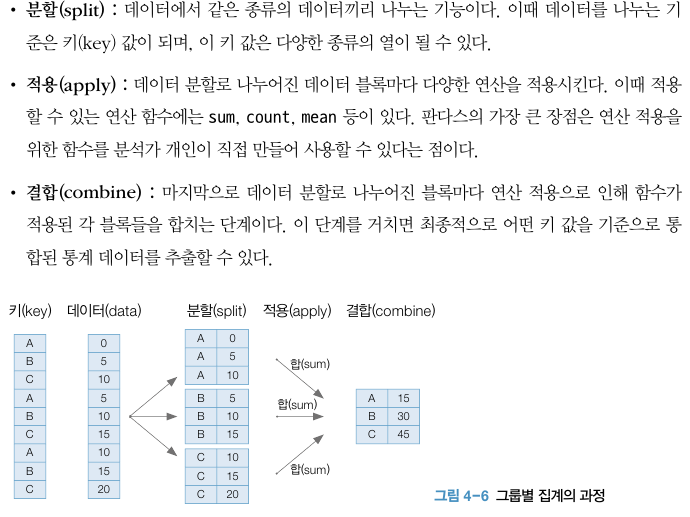

### 2 그룹별 집계 사용하기

#### 2.1 그룹별 집계의 기본형


In [37]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings', 
                     'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 
                     'Royals', 'Riders'],
            'Rank': [1, 2, 2, 3, 3, 4, 1, 1, 2, 4, 1, 2],
            'Year': [2014, 2015, 2014, 2015, 2014, 2015, 2016,
                     2017, 2016, 2014, 2015, 2017],
            'Points':[876, 789, 863, 673, 741, 812,
                      756, 788, 694, 701, 804, 690]}

df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [38]:
df.groupby("Team")["Points"].sum()

Team
Devils    1536
Kings     3097
Riders    3049
Royals    1505
Name: Points, dtype: int64

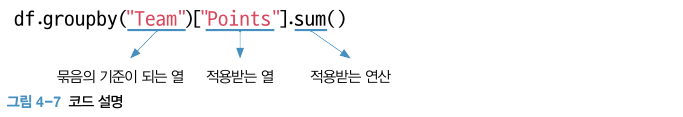

#### 2.2 멀티 인덱스 그룹별 집계

In [39]:
multi_groupby = df.groupby(["Team", "Year"])["Points"].sum()
multi_groupby

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2015    812
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
Name: Points, dtype: int64

#### 2.3 멀티 인덱스
- 그룹별 집계를 수행하면 해당 열들이 모두 인덱스로 변환되는데 이를 멀티 인덱스라 한다.
- 이러한 멀티 인덱스는 다음 코드와 같이 인덱스 요소(index property)를 이용해서 확인 할 수 있다.

In [40]:
multi_groupby = df.groupby(["Team", "Year"])["Points"].sum()
multi_groupby.index

MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2015),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015)],
           names=['Team', 'Year'])

In [41]:
multi_groupby["Devils":"Kings"]

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2015    812
        2016    756
        2017    788
Name: Points, dtype: int64

- unstack함수를 사용하여 기존 인덱스를 기준으로 묶인 데이터에서 두 번째 인덱스를 열로 변화시켜 엑셀의 피봇테이블과 비슷한 형태로 데이터를 볼 수 있다.

In [42]:
multi_groupby.unstack()

Year,2014,2015,2016,2017
Team,,,,
Devils,863.0,673.0,NaN,NaN
Kings,741.0,812.0,756.0,788.0
Riders,876.0,789.0,694.0,690.0
Royals,701.0,804.0,NaN,NaN


- swaplevel 함수를 이용하면 인덱스 간의 레벨을 변결 할 수 있다.

In [43]:
multi_groupby.swaplevel().sort_index()

Year  Team  
2014  Devils    863
      Kings     741
      Riders    876
      Royals    701
2015  Devils    673
      Kings     812
      Riders    789
      Royals    804
2016  Kings     756
      Riders    694
2017  Kings     788
      Riders    690
Name: Points, dtype: int64

In [44]:
multi_groupby.groupby(level=0).sum()

Team
Devils    1536
Kings     3097
Riders    3049
Royals    1505
Name: Points, dtype: int64

In [45]:
multi_groupby.groupby(level=1).sum()

Year
2014    3181
2015    3078
2016    1450
2017    1478
Name: Points, dtype: int64

### 3 그룹화된 상태
- 분할->적용->결합으로 이루어지는 grouby 함수 사용에서 분할만 적용한 상태로 데이터를 다룰 수 있는데, 이를 그룹화된(grouped) 상태라 부른다. 
- 그룹화된 상태에서 get_group 함수를 사용하면 해당 키 값을 기준으로 분할된 데이터프레임 객체를 확인 할 수 있다.

In [46]:
grouped = df.groupby("Team")
grouped.get_group("Riders")

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
8,Riders,2,2016,694
11,Riders,2,2017,690


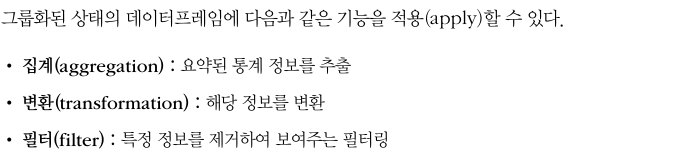

#### 3.1 집계
- 집계(aggregation)를 적용하기 위해 agg 함수를 사용한다.
- agg 함수는 다양한 함수를 그대로 적용시킨다는 측면에서 단순히 grouby를 사용했을 때의 결과와 크게 차이가 없다.

In [47]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [48]:
grouped.agg('min')

,Rank,Year,Points
Team,,,
Devils,2,2014,673
Kings,1,2014,741
Riders,1,2014,690
Royals,1,2014,701


In [49]:
grouped.agg('mean')

,Rank,Year,Points
Team,,,
Devils,2.50,2014.5,768.00
Kings,2.25,2015.5,774.25
Riders,1.75,2015.5,762.25
Royals,2.50,2014.5,752.50


#### 3.2 변환
- 변환(transformation)은 집계(aggregation)와 달리 키 값 별로 요약된 정보가 아니라 개별 데이터들의 변환을 지원한다. 
- 적용하는 시점에서 그룹화된 상태의 값으로 적용
- 그룹화된 상태에서 통계정보가 필요하다면 transform 함수를 이용하여 연산 할 수 있다.

In [50]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [51]:
grouped.transform('max')

,Rank,Year,Points
0,2,2017,876
1,2,2017,876
2,3,2015,863
3,3,2015,863
4,4,2017,812
5,4,2017,812
6,4,2017,812
7,4,2017,812
8,2,2017,876
9,4,2015,804


In [52]:
score = lambda x: (x - x.mean()) / x.std()
grouped.transform(score)

,Rank,Year,Points
0,-1.500000,-1.161895,1.284327
1,0.500000,-0.387298,0.302029
2,-0.707107,-0.707107,0.707107
3,0.707107,0.707107,-0.707107
4,0.500000,-1.161895,-1.042333
5,1.166667,-0.387298,1.183401
6,-0.833333,0.387298,-0.572108
7,-0.833333,1.161895,0.431040
8,0.500000,0.387298,-0.770596
9,0.707107,-0.707107,-0.707107


#### 3.4 필터
- 필터는 특정 조건으로 데이터를 검색할 대 사용하는 함수이다.


In [53]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [54]:
df.groupby('Team').filter(lambda x: len(x) >= 3)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [55]:
df.groupby('Team').filter(
    lambda x:x["Points"].max() > 810)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


## 4 병합과 연결
- 빅데이터를 다루다 보면 생각보다 많은 데이터를 만나게 된다. 
- 하나 이상의 엑셀파일처럼 단일 데이터를 다루는 경우는 거의 없고 많게는 수십 개의 파일들을 다루면서 필요한 경우 데이터를 합치는 작업을 접하게 된다.

### 1 병합
- 병합은 기본적으로 두 개의 데이터를 특정한 기준을 가지고 하나로 통합하는 작업이다.   
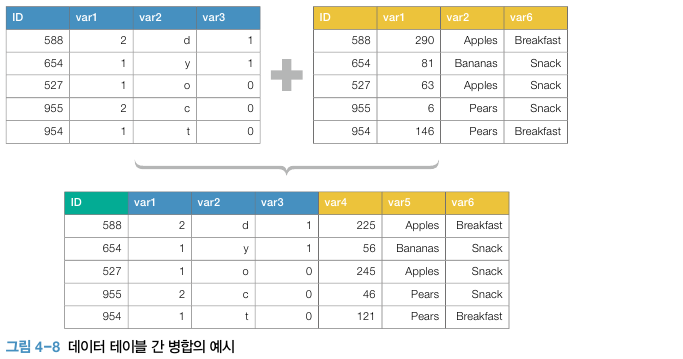   
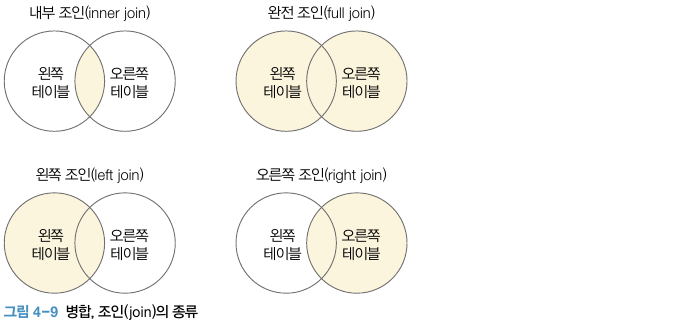

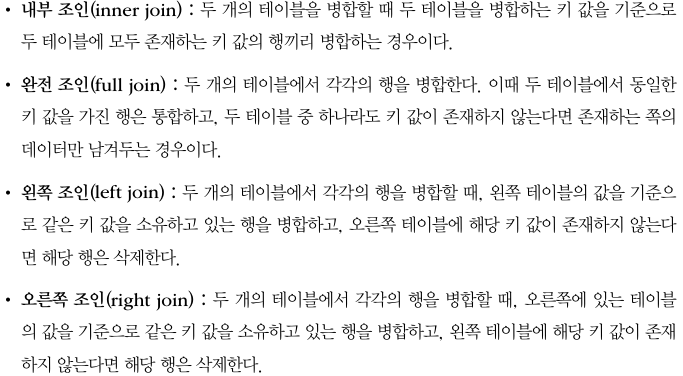

#### 1.1 내부 조인

In [56]:
raw_data = {
    'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
    'test_score': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

df_left = pd.DataFrame(raw_data, columns = ['subject_id', 'test_score'])
df_left

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [57]:
raw_data = {
    'subject_id': ['4', '5', '6', '7', '8'],
    'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
    'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

df_right = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_right

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [58]:
pd.merge(left=df_left, right=df_right, how="inner", on='subject_id')
# how="inner" -> 내부 조인

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


#### 1.2 왼쪽 조인, 오른쪽 조인

In [59]:
pd.merge(df_left, df_right, on='subject_id', how='left')

,subject_id,test_score,first_name,last_name
0,1,51,NaN,NaN
1,2,15,NaN,NaN
2,3,15,NaN,NaN
3,4,61,Billy,Bonder
4,5,16,Brian,Black
5,7,14,Bryce,Brice
6,8,15,Betty,Btisan
7,9,1,NaN,NaN
8,10,61,NaN,NaN
9,11,16,NaN,NaN


In [60]:
pd.merge(df_left, df_right,on='subject_id', how='right')

,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,6,NaN,Bran,Balwner
3,7,14.0,Bryce,Brice
4,8,15.0,Betty,Btisan


#### 1.3 완전 조인

In [61]:
pd.merge(df_left, df_right, on='subject_id', how='outer')
# how='outer' -> 완전 조인

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,10,61.0,NaN,NaN
2,11,16.0,NaN,NaN
3,2,15.0,NaN,NaN
4,3,15.0,NaN,NaN
5,4,61.0,Billy,Bonder
6,5,16.0,Brian,Black
7,6,NaN,Bran,Balwner
8,7,14.0,Bryce,Brice
9,8,15.0,Betty,Btisan


In [62]:
df_left.index = df_left.subject_id
del df_left["subject_id"]
df_right.index = df_right.subject_id
del df_right["subject_id"]

pd.merge(df_left, df_right, on='subject_id', how='inner')

,test_score,first_name,last_name
subject_id,,,
4,61,Billy,Bonder
5,16,Brian,Black
7,14,Bryce,Brice
8,15,Betty,Btisan


### 연결
- 두개의 테이블을 그대로 붙이는 방법으로 대개 'concat'라고 표현한다.

In [63]:
import os
filenames = [os.path.join("c:/py_data/source/ch04", filename)
             for filename in os.listdir("c:/py_data/source/ch04") if "sales" in filename]
print(filenames)

['c:/py_data/source/ch04\\sales-feb-2014.xlsx', 'c:/py_data/source/ch04\\sales-jan-2014.xlsx', 'c:/py_data/source/ch04\\sales-mar-2014.xlsx']


In [64]:
os.listdir("c:/py_data/source/ch04")

['excel-comp-data.xlsx',
 'sales-feb-2014.xlsx',
 'sales-jan-2014.xlsx',
 'sales-mar-2014.xlsx']

In [65]:
df_list = [pd.read_excel(filename, engine="openpyxl") for filename in filenames]
for df in df_list:
    print(type(df), len(df))

<class 'pandas.core.frame.DataFrame'> 108
<class 'pandas.core.frame.DataFrame'> 134
<class 'pandas.core.frame.DataFrame'> 142


In [66]:
df = pd.concat(df_list, axis=0)
print(len(df)) # 384
df.reset_index(drop=True)

384


,account number,name,sku,quantity,unit price,ext price,date
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59
1,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32,2014-02-01 11:51:46
2,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97,2014-02-01 17:24:32
3,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70,2014-02-01 19:56:48
4,672390,Kuhn-Gusikowski,S1-06532,48,55.82,2679.36,2014-02-02 03:45:20
...,...,...,...,...,...,...,...
379,737550,"Fritsch, Russel and Anderson",B1-65551,12,56.24,674.88,2014-03-31 08:43:24
380,642753,Pollich LLC,S1-93683,21,92.57,1943.97,2014-03-31 11:37:34
381,412290,Jerde-Hilpert,B1-20000,30,22.38,671.40,2014-03-31 21:41:31
382,307599,"Kassulke, Ondricka and Metz",S2-16558,46,56.04,2577.84,2014-03-31 22:11:22


In [67]:
df.to_csv("c:/py_data/source/ch04/total_sales.csv")